In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Task 1
Написать программу, оценивающую значение машинного эпсилон для стандартных чисел с двойной точностью.
____

- Machine epsilon gives an upper bound on the relative error due to rounding in floating point arithmetic. (Wikipedia)
- Double-precision floating-point format is a computer number format, usually occupying 64 bits in computer memory; it represents a wide dynamic range of numeric values by using a floating radix point. (Wikipedia)
- According to Prof. Demmel, LAPACK, Scilab: $$MachineEps = -b^{-(p-1)}/2$$
- According to Prof. Higham; ISO C standard; C, C++ and Python language constants; Mathematica, MATLAB and Octave: $$MachineEps = -b^{-(p-1)}$$

As you can see, in Python machine epsilon is:

In [2]:
sys.float_info.epsilon

2.220446049250313e-16

Let's estimate it for integer, float and complex number.

In [33]:
def estimateMachineEps(func=float):
    machExp = func(1)
    step = 0
    while func(1)+func(machExp) != func(1):
        machExpTotal = machExp
        machExp = func(machExp) / func(2)
        step += 1
        print('Step %i: '%step, machExpTotal)
    return machExpTotal

In [34]:
estimateMachineEps(int)

Step 1:  1


1

In [35]:
estimateMachineEps(float)

Step 1:  1.0
Step 2:  0.5
Step 3:  0.25
Step 4:  0.125
Step 5:  0.0625
Step 6:  0.03125
Step 7:  0.015625
Step 8:  0.0078125
Step 9:  0.00390625
Step 10:  0.001953125
Step 11:  0.0009765625
Step 12:  0.00048828125
Step 13:  0.000244140625
Step 14:  0.0001220703125
Step 15:  6.103515625e-05
Step 16:  3.0517578125e-05
Step 17:  1.52587890625e-05
Step 18:  7.62939453125e-06
Step 19:  3.814697265625e-06
Step 20:  1.9073486328125e-06
Step 21:  9.5367431640625e-07
Step 22:  4.76837158203125e-07
Step 23:  2.384185791015625e-07
Step 24:  1.1920928955078125e-07
Step 25:  5.960464477539063e-08
Step 26:  2.9802322387695312e-08
Step 27:  1.4901161193847656e-08
Step 28:  7.450580596923828e-09
Step 29:  3.725290298461914e-09
Step 30:  1.862645149230957e-09
Step 31:  9.313225746154785e-10
Step 32:  4.656612873077393e-10
Step 33:  2.3283064365386963e-10
Step 34:  1.1641532182693481e-10
Step 35:  5.820766091346741e-11
Step 36:  2.9103830456733704e-11
Step 37:  1.4551915228366852e-11
Step 38:  7.2759576

2.220446049250313e-16

In [36]:
estimateMachineEps(complex)

Step 1:  (1+0j)
Step 2:  (0.5+0j)
Step 3:  (0.25+0j)
Step 4:  (0.125+0j)
Step 5:  (0.0625+0j)
Step 6:  (0.03125+0j)
Step 7:  (0.015625+0j)
Step 8:  (0.0078125+0j)
Step 9:  (0.00390625+0j)
Step 10:  (0.001953125+0j)
Step 11:  (0.0009765625+0j)
Step 12:  (0.00048828125+0j)
Step 13:  (0.000244140625+0j)
Step 14:  (0.0001220703125+0j)
Step 15:  (6.103515625e-05+0j)
Step 16:  (3.0517578125e-05+0j)
Step 17:  (1.52587890625e-05+0j)
Step 18:  (7.62939453125e-06+0j)
Step 19:  (3.814697265625e-06+0j)
Step 20:  (1.9073486328125e-06+0j)
Step 21:  (9.5367431640625e-07+0j)
Step 22:  (4.76837158203125e-07+0j)
Step 23:  (2.384185791015625e-07+0j)
Step 24:  (1.1920928955078125e-07+0j)
Step 25:  (5.960464477539063e-08+0j)
Step 26:  (2.9802322387695312e-08+0j)
Step 27:  (1.4901161193847656e-08+0j)
Step 28:  (7.450580596923828e-09+0j)
Step 29:  (3.725290298461914e-09+0j)
Step 30:  (1.862645149230957e-09+0j)
Step 31:  (9.313225746154785e-10+0j)
Step 32:  (4.656612873077393e-10+0j)
Step 33:  (2.328306436538

(2.220446049250313e-16+0j)

____

### Task 2
Привести пример функции, производную которой нельзя вычислить методом дифференцирования с комплексным шагом.
_____

In [37]:
def complex_step(f, eps=1e-10):
    """
    Higher-order function takes univariate function which computes a value and
    returns a function which returns value-derivative pair approximation.
    """
    def f1(x):
        y = f(complex(x, eps))         # convert input to complex number
        return (y.real, y.imag / eps)  # return function value and gradient
    return f1

f = lambda x: np.exp(x)+np.cos(x)+10  # function
g = lambda x: np.exp(x)-np.sin(x)     # gradient
x = 1.0
print (f(x), g(x))
print (complex_step(f)(x))

_______
### Task 3
Релизовать алгоритм вычисления первой производной методом дифференцирования с комплексным шагом. Для функции с известным значением производной, изучить сходимость численного ответа при уменьшении шага.
_____

Classic function for complex step differentiation: https://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/

In [8]:
f = lambda x: np.exp(x)/((np.cos(x))**3 + np.sin(x)**3)

In [14]:
def testFunction(testF, dotX):
    dotY = testF(dotX)
    x = np.linspace(-dotX,dotX * 2, 1000, endpoint=True) 
    y = testF(x)

    plt.figure()
    plt.plot(x,y)
    plt.plot(dotX, dotY, 'o')

    plt.xlim((-dotX, dotX * 2))
    plt.ylim((0, 6))

    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.annotate(xy=(0,5),s=r'$f(x)=\frac{e^x}{\cos(x)^3+\sin(x)^3}$',fontsize=20)

    plt.plot()
    plt.show()

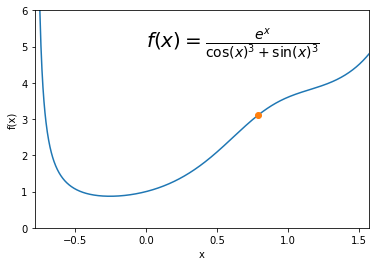

In [82]:
testFunction(f, np.pi/4)

In [64]:
# The complex step approximation 
def df_pc(x, h):
    return np.imag(f(x + 1j*h))/h

def df_ff(x, h):
    return (f(x + h) - F(x))/h

# The centered finite difference approximation with step size h is
def df_pd(x, h):
    return (f(x + h) - f(x - h))/(2 * h)

def df_diff(x):
    return ((np.exp(x)*(np.cos(3*x) + np.sin(3*x)/2 + (3*np.sin(x))/2)) / 
            (np.cos(x)**3 + np.sin(x)**3)**2)

In [71]:
dotX = np.pi/4
h_list = np.logspace(-15,-1,15, endpoint=True)

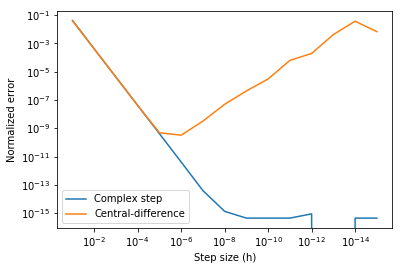

In [75]:
error_pcs = np.zeros(h_list.shape)
error_pds = np.zeros(h_list.shape)
error_ffs = np.zeros(h_list.shape)

exact = df_diff(dotX)
for i, h in enumerate(h_list):
    error_pcs[i] = np.abs(df_pc(dotX, h) - exact)
#   /np.abs(exact)
    error_pds[i] = np.abs(df_pd(dotX, h) - exact)
#     /np.abs(exact)
#     error_ffs[i] = np.abs(df_ff(dotX, h) - exact)/np.abs(exact)

plt.figure()
plt.loglog(h_list, error_pcs, label='Complex step')
# plt.loglog(h_list, error_ffs, label='Forward difference')
plt.loglog(h_list, error_pds, label='Central-difference')

plt.gca().invert_xaxis()
plt.legend()
plt.ylabel('Normalized error')
plt.xlabel('Step size (h)')

plt.show()

This confirms that complex step is accurate for small step sizes whereas the finite difference approach never achieves full accuracy.

_______
### Task 4
Прямым вычислением показать, что один шаг экстраполяции Ричардсона для центральной схемы вычисления первой производной воспроизводит явную форму разностной схемы порядка  $$O(h^4)$$
_____


    Richardson's Extrapolation to approximate  f'(x) at a particular x.
    
    Based on an algorithm in "Numerical Mathematics and Computing"
    4th Edition, by Cheney and Kincaid, Brooks-Cole, 1999.

In [159]:
# f – function
# x - value of x to find derivative at
# n - number of levels of extrapolation
# h - initial stepsize

def richardson( f, x, n, h ):
    # d[n,n] will contain the most accurate approximation to f'(x).
    d = np.array( [[0] * (n + 1)] * (n + 1), float )
    
    for i in range(n + 1):
        d[i,0] = (f(x + h) - f(x - h))/(2 * h)

        power = 1  
        for j in range(1, i + 1):
            power = 4 * power
#             d[i,j] = d[i,j-1] + (d[i,j-1] - d[i-1,j-1])/(power - 1)
            d[i,j] = (power * d[i,j-1] - d[i-1,j-1])/(power - 1)

        h = h/2
    return d

In [154]:
f = lambda x: x**2
f1 = lambda x: x**2 + 5* np.cos(x)
f2 = lambda x: x + 2 * x**5 - np.exp(x) * np.sin(x)

In [158]:
"""
    OUTPUT:
    numpy float array -  two-dimensional array of extrapolation values.
                         The [n,n] value of this array should be the
                         most accurate estimate of f'(x).
"""
print(richardson(f, 1, 1, 0.1))
print(richardson(f1, 2, 1, 0.1))
print(richardson(f2, 2, 1, 0.1))

[[2. 0.]
 [2. 2.]]
[[-0.53891344  0.        ]
 [-0.544593   -0.54648619]]
[[158.18894069   0.        ]
 [157.56425737 157.35602959]]


____
### Task 5 
Написать программу, вычисляющую производную функции  $$x^{2}ln(x)$$ в точке <i>x = 0</i> с точностью $$O(h^2)$$
 ____